In [1]:
from arc_cycle import system

system.run(70 * 24 * 3600)

C:\Users\remidm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Text(0, 0.5, 'Inventories (kg)')

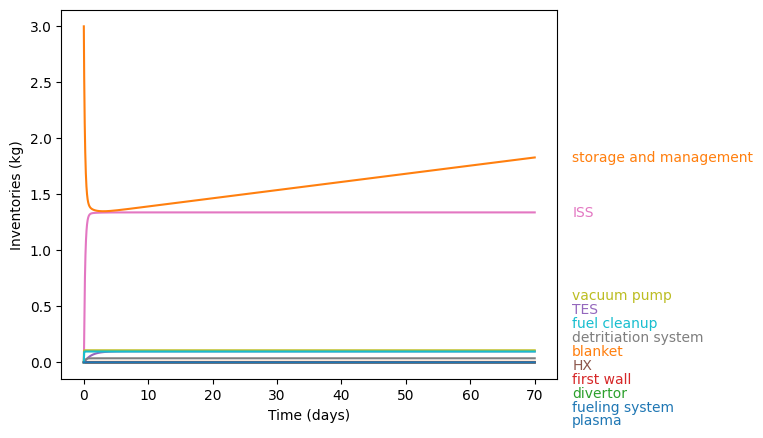

In [2]:
import matplotlib.pyplot as plt
import matplotx
import numpy as np

for box in system.boxes:
    plt.plot(np.array(system.t)/3600/24, box.concentrations, label=box.name)

matplotx.line_labels()
plt.xlabel("Time (days)")
plt.ylabel("Inventories (kg)")


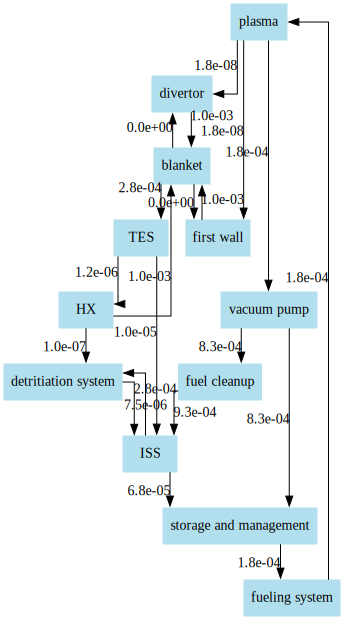

In [3]:
import graphviz
graph = graphviz.Digraph('system-graph', comment='My System Graph', graph_attr={'splines': 'ortho'}, node_attr={'color': 'lightblue2', 'style': 'filled'})


for box in system.boxes:
    graph.node(box.name, box.name, shape='box')

for box in system.boxes:
    for output, flowrate in box.outputs.items():
        graph.edge(box.name, output.name, xlabel=f"{flowrate:.1e}")

    for output, flow in box.constant_outputs.items():
        graph.edge(box.name, output.name, xlabel=f"{flow:.1e}")

graph